In [56]:
import csv
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from mpl_toolkits import mplot3d
from numpy import set_printoptions
from numpy import absolute
from numpy import mean
from numpy import std



from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.models import model_from_json

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from matplotlib import pyplot

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
    
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
import seaborn as sns
%matplotlib inline

In [2]:
prosody_data = pd.read_csv('prosodic_features_M.csv ')

In [3]:
prosody_data.head()

,participant&question,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,...,RecommendHiring,Hired,Friendly,Friendly_c,StructuredAnswers,StructuredAnswers_c,NotStressed,NotStressed_c,Colleague,Hired_M
0,P1Q1,51.952125,0.015331,0.000295,75.232657,396.635613,127.989222,27.821528,217.628692,119.690367,...,5.106224,0,5.254784,1,4.89158,0,5.35076,0,5.333004,1
1,P1Q2,38.677312,0.015185,0.000393,75.165527,397.613041,131.067490,26.452853,195.852246,124.820583,...,5.106224,0,5.254784,1,4.89158,0,5.35076,0,5.333004,1
2,P1Q3,43.593896,0.014680,0.000337,71.034761,395.930688,127.739086,26.006330,189.441736,120.457847,...,5.106224,0,5.254784,1,4.89158,0,5.35076,0,5.333004,1
3,P1Q4,23.435813,0.008920,0.000381,74.938673,248.733738,129.563914,19.334327,103.024640,124.473851,...,5.106224,0,5.254784,1,4.89158,0,5.35076,0,5.333004,1
4,P1Q5,13.274833,0.003432,0.000259,93.949854,263.669188,130.178482,26.595483,174.934601,120.272480,...,5.106224,0,5.254784,1,4.89158,0,5.35076,0,5.333004,1


In [4]:
prosody_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   participant&question  680 non-null    object 
 1   duration              680 non-null    float64
 2   energy                680 non-null    float64
 3   power                 680 non-null    float64
 4   min_pitch             680 non-null    float64
 5   max_pitch             680 non-null    float64
 6   mean_pitch            680 non-null    float64
 7   pitch_sd              680 non-null    float64
 8   pitch_abs             680 non-null    float64
 9   pitch_quant           680 non-null    float64
 10  pitchUvsVRatio        680 non-null    float64
 11  Time:8                680 non-null    float64
 12  iDifference           680 non-null    float64
 13  diffPitchMaxMin       680 non-null    float64
 14  diffPitchMaxMean      680 non-null    float64
 15  diffPitchMaxMode      6

In [5]:
prosody_data.describe()

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,...,RecommendHiring,Hired,Friendly,Friendly_c,StructuredAnswers,StructuredAnswers_c,NotStressed,NotStressed_c,Colleague,Hired_M
count,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,...,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,57.201539,0.010119,0.000159,74.356906,365.209221,169.242881,42.009550,246.886862,163.655634,1.193068,...,4.950746,0.073529,5.428758,0.470588,4.740523,0.154412,5.420034,0.500000,5.017544,0.941176
std,36.117420,0.012226,0.000130,8.332808,41.614286,41.921335,13.154095,76.500370,46.615600,0.795525,...,0.721579,0.261196,0.761720,0.499502,0.690786,0.361609,0.545949,0.500368,0.593729,0.450245
min,10.341458,0.000176,0.000013,56.049663,222.555742,92.979514,12.053274,76.004974,82.801688,0.301339,...,3.189661,0.000000,3.367100,0.000000,2.808731,0.000000,3.861496,0.000000,3.548270,0.000000
25%,32.839339,0.002527,0.000065,71.320330,339.477409,124.543847,33.160269,196.724385,113.288462,0.736553,...,4.529477,0.000000,4.988128,0.000000,4.306155,0.000000,5.067056,0.000000,4.618957,1.000000
50%,49.762437,0.005648,0.000119,73.929065,376.743832,180.010964,40.569432,247.524278,178.438806,1.035074,...,4.967754,0.000000,5.454238,0.000000,4.808708,0.000000,5.498800,0.500000,5.051179,1.000000
75%,71.724484,0.013414,0.000221,75.644207,397.296921,203.342602,48.220307,293.743385,203.973193,1.350608,...,5.448852,0.000000,6.042685,1.000000,5.210984,0.000000,5.769599,1.000000,5.399822,1.000000
max,376.992000,0.134692,0.000873,198.840510,424.360354,254.871233,97.363392,524.459680,247.959843,7.681538,...,6.647218,1.000000,6.794652,1.000000,6.428013,1.000000,6.487857,1.000000,6.398213,2.000000


In [50]:
dA = pd.read_csv('prosodic_features_M2.csv ')
yRH = prosody_data['RecommendHiring']
yF = prosody_data['Friendly']
ySA = prosody_data['StructuredAnswers']
yNS = prosody_data['NotStressed']
cRH = prosody_data['Hired']
cF = prosody_data['Friendly_c']
cSA = prosody_data['StructuredAnswers_c']
cNS = prosody_data['NotStressed_c']
MRH = prosody_data['Hired_M']
print(prosody_data[['Hired_M','NotStressed_c']].values.astype(float))

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [7]:
def drawHistogram(feature_name):
    sns.set_style('whitegrid')
    prosody_data[feature_name].hist(bins=30)
    plt.xlabel(feature_name)

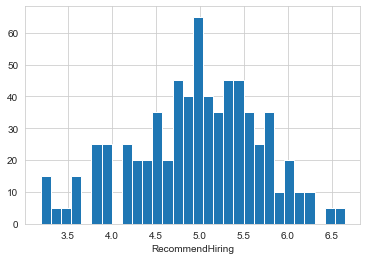

In [8]:
drawHistogram('RecommendHiring')

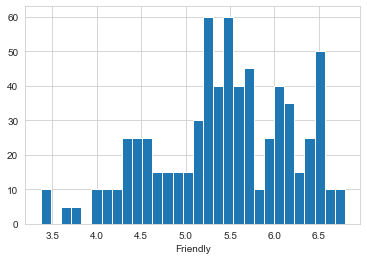

In [9]:
drawHistogram('Friendly')

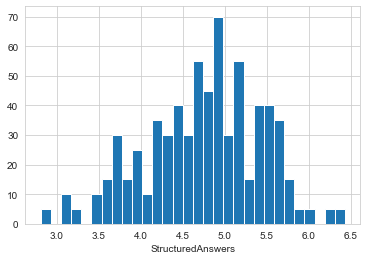

In [10]:
drawHistogram('StructuredAnswers')

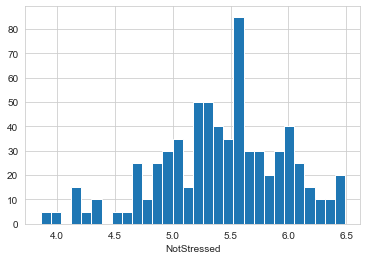

In [11]:
drawHistogram('NotStressed')

In [12]:
cor = dA.corr()
cor.style.background_gradient(cmap="coolwarm").set_precision(2)

,duration,energy,power,min_pitch,max_pitch,mean_pitch,pitch_sd,pitch_abs,pitch_quant,pitchUvsVRatio,Time:8,iDifference,diffPitchMaxMin,diffPitchMaxMean,diffPitchMaxMode,intensityMin,intensityMax,intensityMean,intensitySD,intensityQuant,diffIntMaxMin,diffIntMaxMean,diffIntMaxMode,avgVal1,avgVal2,avgVal3,avgBand1,avgBand2,avgBand3,fmean1,fmean2,fmean3,f2meanf1,f3meanf1,f1STD,f2STD,f3STD,f2STDf1,f2STDf2,jitter,shimmer,jitterRap,meanPeriod,percentUnvoiced,numVoiceBreaks,speakRate,PercentBreaks,numPause,maxDurPause,avgDurPause,TotDurPause:3,iInterval,MaxRising:3,MaxFalling:3,AvgTotRis:3,AvgTotFall:3,numRising,numFall,RecommendHiring,Colleague,Engaged,Excited,SpeakingRate,NoFillers,Friendly,Paused,EngagingTone,StructuredAnswers,Calm,NotStressed,Focused,Authentic,NotAwkward
duration,1.00,0.59,0.23,-0.30,0.42,-0.23,0.01,-0.15,-0.25,0.06,1.00,-0.09,0.46,0.51,0.50,-0.09,0.45,0.28,0.30,0.23,0.47,0.49,0.44,-0.14,-0.22,-0.03,-0.13,-0.12,-0.14,-0.14,-0.22,-0.03,0.02,0.14,0.10,0.31,0.13,0.11,-0.01,-0.02,0.03,-0.05,0.23,0.09,0.94,-0.67,0.28,0.97,0.37,0.10,0.98,0.93,0.57,0.57,-0.02,0.04,0.95,0.86,0.04,-0.17,0.22,0.18,-0.12,-0.31,-0.00,-0.62,0.09,-0.37,0.05,0.14,-0.05,0.05,0.10
energy,0.59,1.00,0.85,-0.02,0.36,-0.18,-0.10,-0.07,-0.20,-0.19,0.59,-0.04,0.35,0.42,0.42,0.07,0.78,0.77,0.74,0.68,0.75,0.32,0.41,-0.29,-0.25,-0.17,-0.38,-0.33,-0.29,-0.29,-0.25,-0.17,0.19,0.24,-0.02,0.26,0.03,0.20,0.06,-0.17,-0.23,-0.20,0.19,-0.18,0.50,-0.53,-0.08,0.53,0.27,0.15,0.61,0.50,0.43,0.39,0.01,-0.02,0.53,0.47,0.22,0.10,0.38,0.41,0.15,-0.12,0.25,-0.44,0.41,-0.21,-0.04,0.17,0.13,0.24,0.24
power,0.23,0.85,1.00,0.12,0.33,-0.08,-0.12,0.02,-0.11,-0.30,0.23,0.03,0.29,0.30,0.31,0.20,0.82,0.91,0.81,0.84,0.76,0.15,0.28,-0.38,-0.27,-0.27,-0.52,-0.46,-0.36,-0.38,-0.27,-0.27,0.30,0.30,-0.16,0.17,-0.05,0.29,0.16,-0.20,-0.34,-0.24,0.10,-0.35,0.17,-0.39,-0.28,0.20,0.13,0.09,0.25,0.17,0.30,0.23,0.04,-0.02,0.19,0.20,0.32,0.27,0.42,0.49,0.31,-0.03,0.35,-0.18,0.54,0.01,-0.10,0.12,0.22,0.28,0.32
min_pitch,-0.30,-0.02,0.12,1.00,-0.17,0.25,-0.22,-0.14,0.25,-0.14,-0.30,0.01,-0.34,-0.36,-0.35,-0.08,0.08,0.11,0.18,0.06,0.10,-0.02,0.06,0.12,0.17,0.11,0.04,-0.02,0.02,0.12,0.17,0.11,-0.05,-0.08,-0.04,-0.08,-0.13,-0.02,-0.11,-0.21,-0.34,-0.19,-0.20,-0.12,-0.38,0.21,-0.29,-0.33,-0.04,0.08,-0.28,-0.38,-0.34,-0.36,-0.15,-0.27,-0.33,-0.42,-0.04,0.01,0.00,0.03,0.16,0.06,0.04,0.15,0.05,0.00,-0.16,-0.16,0.01,0.06,-0.11
max_pitch,0.42,0.36,0.33,-0.17,1.00,0.32,0.36,0.36,0.28,-0.09,0.42,0.22,0.99,0.36,0.33,0.10,0.47,0.43,0.30,0.42,0.44,0.25,0.23,-0.21,-0.09,-0.03,-0.36,-0.31,-0.20,-0.21,-0.09,-0.03,0.19,0.21,-0.27,-0.06,-0.23,0.24,0.08,0.05,-0.28,0.02,-0.28,-0.20,0.40,-0.49,-0.03,0.42,0.19,0.08,0.41,0.41,0.50,0.50,0.38,0.26,0.39,0.45,0.22,0.20,0.32,0.35,0.09,-0.17,0.33,-0.13,0.36,-0.06,-0.12,0.07,0.01,0.27,0.15
mean_pitch,-0.23,-0.18,-0.08,0.25,0.32,1.00,0.27,0.51,0.99,-0.26,-0.23,0.19,0.26,-0.77,-0.78,-0.19,-0.01,-0.01,-0.04,0.02,0.04,0.00,-0.03,0.02,0.41,0.26,-0.19,-0.01,0.03,0.02,0.41,0.26,0.23,0.10,-0.45,-0.60,-0.65,0.04,-0.18,-0.10,-0.57,-0.08,-0.98,-0.38,-0.32,0.01,-0.47,-0.25,-0.04,0.04,-0.21,-0.29,-0.47,-0.47,0.31,-0.02,-0.27,-0.31,0.15,0.34,0.16,0.31,0.16,0.07,0.48,0.33,0.25,0.18,-0.31,-0.19,0.10,0.30,-0.04
pitch_sd,0.01,-0.10,-0.12,-0.22,0.36,0.27,1.00,0.66,0.24,0.55,0.01,0.25,0.38,-0.03,-0.02,0.00,-0.03,-0.13,-0.17,-0.16,-0.03,0.18,0.15,0.11,0.22,0.25,0.17,0.11,0.19,0.11,0.22,0.25,-0.01,0.00,0.11,-0.17,-0.05,-0.22,-0.21,0.75,0.31,0.75,-0.28,0.38,0.08,0.23,0.47,-0.04,0.25,0.25,0.05,0.10,0.26,0.28,0.84,0.86,-0.02,0.20,-0.15,-0.02,-0.10,-0.12,-0.18,-0.10,0.07,0.13,-0.12,-0.06,-0.08,-0.03,-0.21,-0.05,-0.14
pitch_abs,-0.15,-0.07,0.02,-0.14,0.36,0.51,0.66,1.00,0.50,-0.12,-0.15,0.27,0.37,-0.26,-0.27,0.10,0.03,0.10,-0.05,0.21,0.01,-0.11,-0.20,-0.22,0.01,0.03,-0.29,-0.18,-0.12,-0.22,0.01,0.03,0.28,0.28,-0.34,-0.41,-0.38,0.06,0.02,0.45,-0.05,0.44,-0.50,-0.26,0.00,-0.02,-0.12,-0.10,-0.16,-0.19,-0.16,0.04,0.07,0.08,0.82,0.67,-0.04,0.12,0.18,0.30,0.18,0.23,0.12,-0.04,0.32,0.18,0.17,0.25,-0.18,-0.06,0.

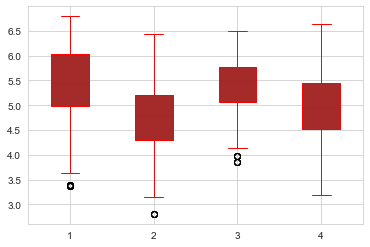

In [13]:
import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
fig, ax = plt.subplots()
box_plot([yF,ySA,yNS,yRH], 'red', 'brown')
#ax.set(y='avgBand1')
plt.show()

import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
fig, ax = plt.subplots()
box_plot([ySA,yRH], 'red', 'brown')
#ax.set(y='avgBand1')
plt.show()

In [14]:
ranks = {}
from sklearn.preprocessing import MinMaxScaler
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    #ranks = map(lambda x: round(x, 5), ranks)
    return dict(zip(names, ranks ))

In [15]:
def select_feature_kbest(prosody_data_y):
    array =  prosody_data.values

    X = prosody_data_X
    Y = prosody_data_y
    # feature extraction
    kbest_test = SelectKBest(score_func=f_classif, k=4)
    fit = kbest_test.fit(X, Y)
    # summarize scores
    set_printoptions(precision=3)
    #print(fit.scores_)
    features = fit.transform(X)
    # summarize selected features
    #print(features[0:5,:])

    ranks["kbest"] = rank_to_dict(np.abs(fit.scores_), prosody_data_X)
    rankDict = {}
    rankDict = ranks["kbest"]
    return rankDict

# Making arrays of Top 10 20 30 Features

In [16]:
def select_features(rankDict):
    selectedFeatures = []

    selectedFeatures = dict(sorted(rankDict.items(), key=lambda item: item[1],reverse=True))


    selectedFeatures_10 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<10):
            selectedFeatures_10.append(key)
            i+=1

    selectedFeatures_20 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<20):
            selectedFeatures_20.append(key)
            i+=1

    selectedFeatures_30 = []
    i=0
    for key in selectedFeatures.keys():
        if(i<30):
            selectedFeatures_30.append(key)
            i+=1
    return selectedFeatures_10,selectedFeatures_20,selectedFeatures_30


In [17]:
prosody_data_X = prosody_data.drop(['participant&question','Hired','RecommendHiring','Friendly','Friendly_c','StructuredAnswers','StructuredAnswers_c','NotStressed','NotStressed_c','Colleague','Hired_M'],axis=1)

# Feature selection for using KBest

In [18]:
#feature ranks for 
prosody_data_y = yRH
X_train, X_test, y_train, y_test = train_test_split(prosody_data_X, prosody_data_y, test_size=0.20, random_state=10)
selectedFeatures_Kbest=select_feature_kbest(yRH)
print("\nScores of Features")
#selectedFeatures_RecommendHiring_Kbest


Scores of Features


In [19]:
selectedFeatures_kbest_10,selectedFeatures_kbest_20,selectedFeatures_kbest_30= select_features(selectedFeatures_Kbest)

print("Top 10 Selected Features Using kbest:",selectedFeatures_kbest_10)

print("\n\n\nTop 20 Selected Features Using kbest:",selectedFeatures_kbest_20)

print("\n\n\nTop 30 Selected Features Using kbest:",selectedFeatures_kbest_30 )

Top 10 Selected Features Using kbest: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean']



Top 20 Selected Features Using kbest: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1']



Top 30 Selected Features Using kbest: ['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3', 'power', 'pitchUvsVRatio', 'f3meanf1', 'intensityMin', 'diffPitchMaxMode']


# Applying Models

In [20]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)


def apply_NN_Moadel(no_of_inNeurons,no_of_hiddenLayerNeurons,no_of_epochs,selectedFeatures_No,d_Var,T_Val1,T_Val2):
    scaler = MinMaxScaler()
    X=scaler.fit_transform(prosody_data[selectedFeatures_No])
    y=d_Var
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
    
    
    cvscores = []
        
    keras.backend.set_floatx('float64')
    
    # create model
    for train, test in kfold.split(X, y):
        model= keras.Sequential([
            keras.layers.Dense(no_of_inNeurons, input_shape=(no_of_inNeurons,), activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(no_of_hiddenLayerNeurons, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
        ])

        # Compile model
        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        # Fit the model
        clf=model.fit(X_train, y_train, epochs=no_of_epochs, batch_size=10, verbose=0)


        # evaluate the model 
        scores = model.evaluate(X_test, y_test, verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

        cvscores.append(scores[1] * 100)
        
               
        
    
    print("CV Score  %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))    
    
    #Plot ROC
    def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
  
    
    pred1=[]
    pred=model.predict(X_test)
    for element in pred:
        if element >= T_Val2:
            pred1.append(2)
        elif element >= T_Val1:
            pred1.append(1)
        else:
            pred1.append(0)
    print(classification_report(y_test,pred1,zero_division=0))
    
    print('MSE',metrics.mean_squared_error(y_test,pred1))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred1), annot = True,fmt='d')
    plt.show
    
    
    return (model, cvscores, tnser_fpr, tnser_tpr, tnser_auc)

In [75]:
# define baseline model
def baseline_model(no_of_inNeurons,no_of_hiddenLayerNeurons):
    # create model
    model = Sequential()
    model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [80]:
model=baseline_model(8,3)
# serialize to JSON
json_file = model.to_json()
with open("my_model", "w") as file:
   file.write(json_file)
# serialize weights to HDF5
model.save_weights(h5_file)


PermissionError: [Errno 13] Permission denied: '..\\my_model'

In [72]:
def apply_NN_Moadel(no_of_inNeurons,no_of_hiddenLayerNeurons,no_of_epochs,selectedFeatures_No,d_Var,T_Val1,T_Val2):
    scaler = MinMaxScaler()
    X=scaler.fit_transform(prosody_data[selectedFeatures_No])
    y=utils.to_categorical(d_Var).astype(int)
    
    #print(X)
    
    #print(y.astype(int))

    my_model = keras.models.load_model('my_model')
    my_model.load_weights("weights.h5")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)
    
    estimator = KerasClassifier(my_model, epochs=no_of_epochs, batch_size=5, verbose=0)
    kfold = KFold(n_splits=10, shuffle=True)
    results = cross_val_score(estimator, X, y, cv=kfold)
    print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [65]:
#SetThreshol values for features
TF = 5     # for Friendly
TNS = 5.5  # for Not Stressed
TSA = 5.5  # for Structured Answer
TRH2 = 6    # for Recommend Hiring
TRH1 = 4

cvscores_NN_10_ridge_StructuredAnswer= []
(model_NN_10_ridge_StructuredAnswer,cvscores_NN_10_ridge_StructuredAnswer,FP_Rate_NN_10_ridge_StructuredAnswer,TP_Rate_NN_10_ridge_StructuredAnswer,auc_NN_10_ridge_StructuredAnswer) = apply_NN_Moadel(10,18,200,selectedFeatures_ridge_10_StructuredAnswer,cSA,TSA)

cvscores_NN_20_ridge_StructuredAnswer= [] 
(model_NN_20_ridge_StructuredAnswer,cvscores_NN_20_ridge_StructuredAnswer,FP_Rate_NN_20_ridge_StructuredAnswer,TP_Rate_NN_20_ridge_StructuredAnswer,auc_NN_20_ridge_StructuredAnswer) = apply_NN_Moadel(20,18,200,selectedFeatures_ridge_20_StructuredAnswer,cSA,TSA)

cvscores_NN_30_ridge_StructuredAnswer= []
(model_NN_30_ridge_StructuredAnswer,cvscores_NN_30_ridge_StructuredAnswer,FP_Rate_NN_30_ridge_StructuredAnswer,TP_Rate_NN_30_ridge_StructuredAnswer,auc_NN_30_ridge_StructuredAnswer) = apply_NN_Moadel(30,24,200,selectedFeatures_ridge_30_StructuredAnswer,cSA,TSA)

cvscores_NN_10_lasso_StructuredAnswer= [] 
(model_NN_10_lasso_StructuredAnswer,cvscores_NN_10_lasso_StructuredAnswer,FP_Rate_NN_10_lasso_StructuredAnswer,TP_Rate_NN_10_lasso_StructuredAnswer,auc_NN_10_lasso_StructuredAnswer) = apply_NN_Moadel(10,18,200,selectedFeatures_lasso_10_StructuredAnswer,cSA,TSA)


cvscores_NN_20_lasso_StructuredAnswer= [] 
(model_NN_20_lasso_StructuredAnswer,cvscores_NN_20_lasso_StructuredAnswer,FP_Rate_NN_20_lasso_StructuredAnswer,TP_Rate_NN_20_lasso_StructuredAnswer,auc_NN_20_lasso_StructuredAnswer) = apply_NN_Moadel(20,18,200,selectedFeatures_lasso_20_StructuredAnswer,cSA,TSA)


cvscores_NN_30_lasso_StructuredAnswer= [] 
(model_NN_30_lasso_StructuredAnswer,cvscores_NN_30_lasso_StructuredAnswer,FP_Rate_NN_30_lasso_StructuredAnswer,TP_Rate_NN_30_lasso_StructuredAnswer,auc_NN_30_lasso_StructuredAnswer) = apply_NN_Moadel(30,24,200,selectedFeatures_lasso_30_StructuredAnswer,cSA,TSA)


cvscores_NN_10_kbest_StructuredAnswer= [] 
(model_NN_10_kbest_StructuredAnswer,cvscores_NN_10_kbest_StructuredAnswer,FP_Rate_NN_10_kbest_StructuredAnswer,TP_Rate_NN_10_kbest_StructuredAnswer,auc_NN_10_kbest_StructuredAnswer) = apply_NN_Moadel(10,18,200,selectedFeatures_kbest_10_StructuredAnswer,cSA,TSA)

cvscores_NN_20_kbest_StructuredAnswer= [] 
(model_NN_20_kbest_StructuredAnswer,cvscores_NN_20_kbest_StructuredAnswer,FP_Rate_NN_20_kbest_StructuredAnswer,TP_Rate_NN_20_kbest_StructuredAnswer,auc_NN_20_kbest_StructuredAnswer) = apply_NN_Moadel(20,18,200,selectedFeatures_kbest_20_StructuredAnswer,cSA,TSA)

cvscores_NN_30_kbest_StructuredAnswer= [] 
(model_NN_30_kbest_StructuredAnswer,cvscores_NN_30_kbest_StructuredAnswer,FP_Rate_NN_30_kbest_StructuredAnswer,TP_Rate_NN_30_kbest_StructuredAnswer,auc_NN_30_kbest_StructuredAnswer) = apply_NN_Moadel(30,24,200,selectedFeatures_kbest_30_StructuredAnswer,cSA,TSA)

In [74]:
cvscores_NN_10_kbest= [] 
#(model_NN_10_kbest,cvscores_NN_10_kbest,FP_Rate_NN_10_kbest,TP_Rate_NN_10_kbest,auc_NN_10_kbest_) = 
apply_NN_Moadel(8,3,200,selectedFeatures_kbest_10,MRH,TRH1,TRH2)


TypeError: cannot pickle '_thread.RLock' object

In [ ]:
def Apply_Model(model,model_name,X_train,X_test,y_train,y_test):
    
    clf = model.fit(X_train,y_train)
    pred = model.predict(X_test)            
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # fit a model
    model.fit(X_train,y_train)
    # predict probabilities
    m_probs = model.predict_proba(X_test)
        
    # keep probabilities for the positive outcome only
    m_probs = m_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    m_auc = roc_auc_score(y_test, m_probs)
    # summarize scores
    # print('No Skill: ROC AUC=%.3f' % (ns_auc))
    # print('Logistic: ROC AUC=%.3f' % (m_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    m_fpr, m_tpr, _ = roc_curve(y_test, m_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(m_fpr, m_tpr, marker='.', label=model_name)   
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred,zero_division=0))
    
    print('MSE',metrics.mean_squared_error(y_test,pred))
    
    if(model == svc_model):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    elif(model == knn):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    elif(model == rfc):
      m_Cross = cross_val_score(model,X20,y20,cv=10)
    print("Mean : ",m_Cross)
    print("CV Score  %.2f%% (+/- %.2f%%)" % (np.mean(m_Cross), np.std(m_Cross)))
    
    
    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, pred), annot = True,fmt='d')
    plt.show()
    
    
    return (m_fpr, m_tpr,m_auc)

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
X20=prosody_data[selectedFeatures_kbest_20]
y20=MRH
X20_train, X20_test, y20_train, y20_test = train_test_split(X20, y20, test_size=0.20, random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
(rfc_fpr, rfc_tpr, rfc_auc)=Apply_Model(rfc,"RFC",X20_train, X20_test, y20_train, y20_test)

cross_val_score(rfc, X20, y20,cv=10)
